## FDMS TME2
Florian Toque & Paul Willot


In [18]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.datasets import fetch_mldata
from sklearn import cross_validation
from sklearn import base
#mnist = fetch_mldata('iris')

import matplotlib.pyplot as plt


In [138]:
ds = sklearn.datasets.make_classification(n_samples=2500,
                                          n_features=30,    # 30 features
                                          n_informative=5,  # only 5 informatives ones
                                          n_redundant=0,
                                          n_repeated=3,     # and 3 duplicate
                                          n_classes=2,
                                          n_clusters_per_class=1,
                                          weights=None,
                                          flip_y=0.03,
                                          class_sep=0.8,
                                          hypercube=True,
                                          shift=0.0,
                                          scale=1.0,
                                          shuffle=True,
                                          random_state=None)
X= ds[0]
y= ds[1]

In [139]:
# labels: [0,1] -> [-1,1]
for idx,i in enumerate(y):
    if (i==0):
        y[idx]=-1

print(X[0])
print(y[0])

[-1.89132472 -1.19829669 -0.35170191 -0.8537679  -0.22318093 -0.30615292
  1.32753605  1.00843034  0.52040573 -0.30615292 -0.43829912  0.54239573
 -0.30615292 -0.54965265 -0.78890265  0.17970082 -0.38478043  1.66884563
  0.26740648  1.07208503  0.45644568  0.63672819 -0.43416359 -2.30882695
 -0.30615292 -0.83197154  0.68428988  1.14474651  0.56503869 -1.47022049]
1


---
### L1

In [140]:
class GradientDescent(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb
        self.used_features=len(theta)

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) * (1 / l) + (self.lamb*np.linalg.norm(self.theta))
            gradient = np.dot(xTrans,(np.dot(self.theta,xTrans)-y))
            
            if i%(nbIt/100)==0:
                thetaprime = self.theta - self.eps * (np.sign(theta)*self.lamb)
            else:
                thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                self.theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]
            
            
            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f | Score: %.03f" % (str(i).ljust(6), cost,self.score(X,y)))
                    ttt = self.nb_used_features()
                    print("%d features used"%(ttt))
                    self.used_features=ttt
            elif i%1000==0:
                ttt = self.nb_used_features()
                self.used_features=ttt
            
                
    def predict(self,x):
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        return cpt/len(X)
    
    def nb_used_features(self):
        cpt=0
        for ii in self.theta:
            if ii==0:
                cpt+=1
        return len(self.theta)-cpt

In [141]:
import copy
#theta = np.zeros(len(X[0]))
theta = copy.deepcopy(X[0])
lamb=500
eps=0.00001

gd = GradientDescent(theta,lamb,eps)
#gd.tmp

In [142]:
nbIterations = 1000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)
scores = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scores,np.mean(scores)))

Iteration 0      | Cost: 2550.595989 | Score: 0.642
30 features used
Iteration 100    | Cost: 338.595786 | Score: 0.785
29 features used
Iteration 200    | Cost: 268.509741 | Score: 0.861
9 features used
Iteration 300    | Cost: 271.062358 | Score: 0.862
8 features used
Iteration 400    | Cost: 271.651145 | Score: 0.863
8 features used
Iteration 500    | Cost: 271.770582 | Score: 0.863
8 features used
Iteration 600    | Cost: 271.794294 | Score: 0.863
8 features used
Iteration 700    | Cost: 271.798972 | Score: 0.863
8 features used
Iteration 800    | Cost: 271.799893 | Score: 0.863
8 features used
Iteration 900    | Cost: 271.800074 | Score: 0.863
8 features used
Cross validation scores: [ 0.842  0.864  0.874  0.856  0.858], mean: 0.86


In [143]:
eps=0.00001
la = []
cross_sc = []
used_features = []

for lamb in np.arange(0,2000,200):
    theta = copy.deepcopy(X[0])
    gd = GradientDescent(theta,lamb,eps)
    nbIterations = 4000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %s | Cross val mean: %.03f | Features: %d"%(str(lamb).ljust(5),np.mean(scoresSvm),gd.used_features))
    #print("Lamda: %.02f | Cross val mean: %.02f | Features: %d"%(lamb,gd.score(X,y),gd.used_features))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)
    used_features.append(gd.used_features)

Lamda: 0     | Cross val mean: 0.857 | Features: 30
Lamda: 200   | Cross val mean: 0.861 | Features: 25
Lamda: 400   | Cross val mean: 0.860 | Features: 23
Lamda: 600   | Cross val mean: 0.859 | Features: 21
Lamda: 800   | Cross val mean: 0.859 | Features: 18
Lamda: 1000  | Cross val mean: 0.859 | Features: 14
Lamda: 1200  | Cross val mean: 0.856 | Features: 10
Lamda: 1400  | Cross val mean: 0.853 | Features: 9
Lamda: 1600  | Cross val mean: 0.853 | Features: 8
Lamda: 1800  | Cross val mean: 0.852 | Features: 7


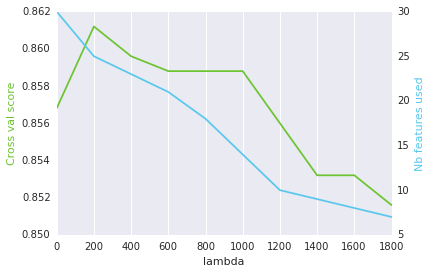

In [144]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(la, cross_sc, '#6DC433')
ax2.plot(la, used_features, '#5AC8ED')

ax1.set_xlabel('lambda')
ax1.set_ylabel('Cross val score', color='#6DC433')
ax2.set_ylabel('Nb features used', color='#5AC8ED')

ax1.yaxis.grid(False)
ax2.grid(False)
plt.show()

---
### L2

In [ ]:
class GradientDescentL2(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*(np.linalg.norm(-self.theta)**2))
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]

            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

In [ ]:
theta = np.zeros(len(X[0]))
lamb=0.05
eps=0.00001
gd = GradientDescentL2(theta,lamb,eps)

nbIterations = 20000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)

print("Score: %s"%gd.score(X,y))

scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresSvm,np.mean(scoresSvm)))

In [ ]:
eps=0.00001
la = []
cross_sc = []

for lamb in np.arange(0,12,0.5):
    theta = np.zeros(len(X[0]))
    gd = GradientDescentL2(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f, Cross val mean: %.02f"%(lamb,np.mean(scoresSvm)))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(la,cross_sc)
plt.ylabel('Cross val score')
plt.xlabel('lambda')
plt.show()